In [102]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from dt_functions import *

In [103]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [104]:
cls_dt = DecisionTreeClassifier(random_state=0)
cls_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

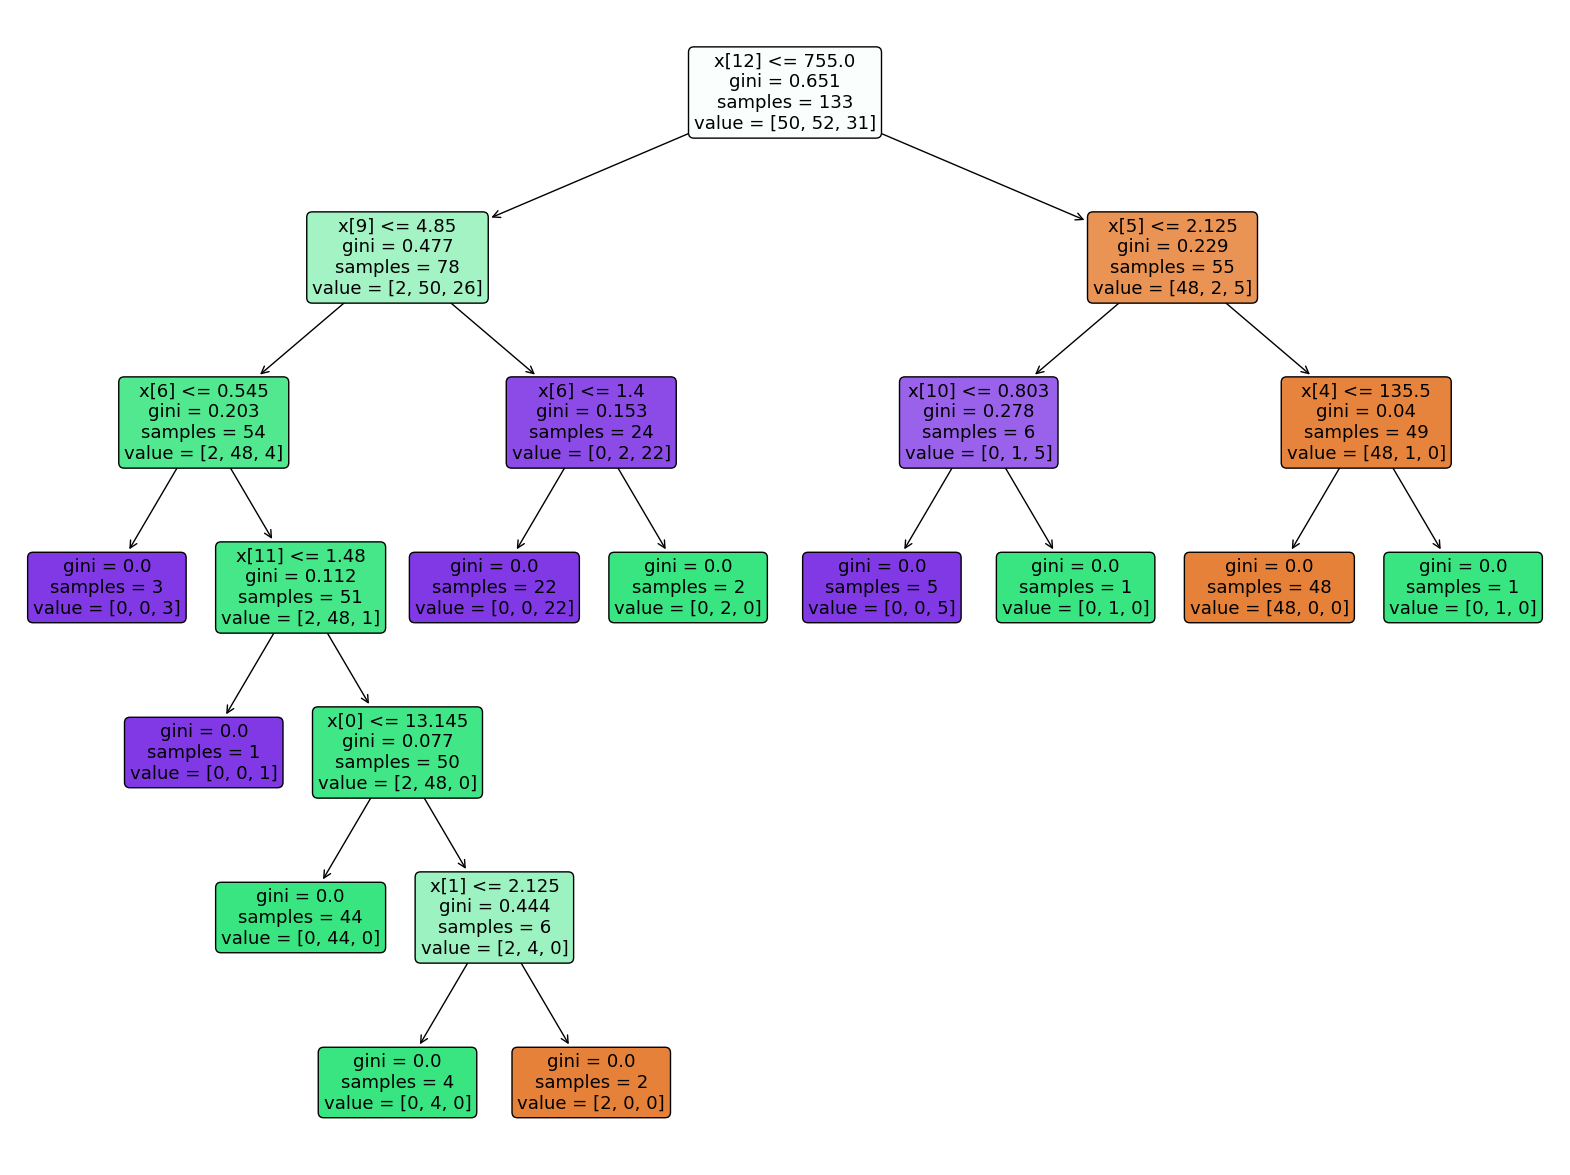

In [105]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(cls_dt, filled=True, rounded=True)

In [106]:
ccp_classifier = DecisionTreeClassifier(random_state=0)
path = ccp_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.01253133 0.0143496  0.0147307  0.02756892 0.03937949
 0.0673381  0.16993338 0.27694759]
[0.         0.01253133 0.05558013 0.07031083 0.09787975 0.13725925
 0.20459735 0.37453073 0.65147832]


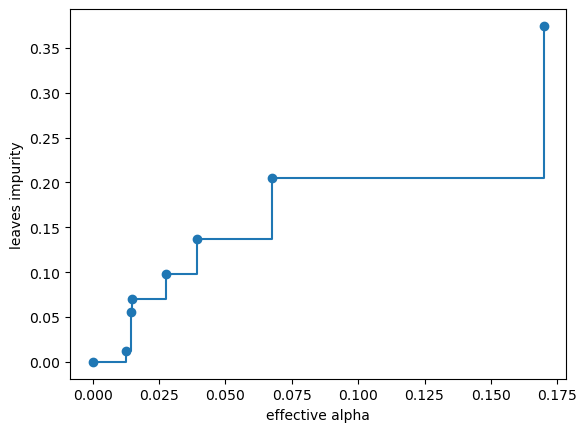

In [107]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
_=ax.set_ylabel("leaves impurity")

In [108]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

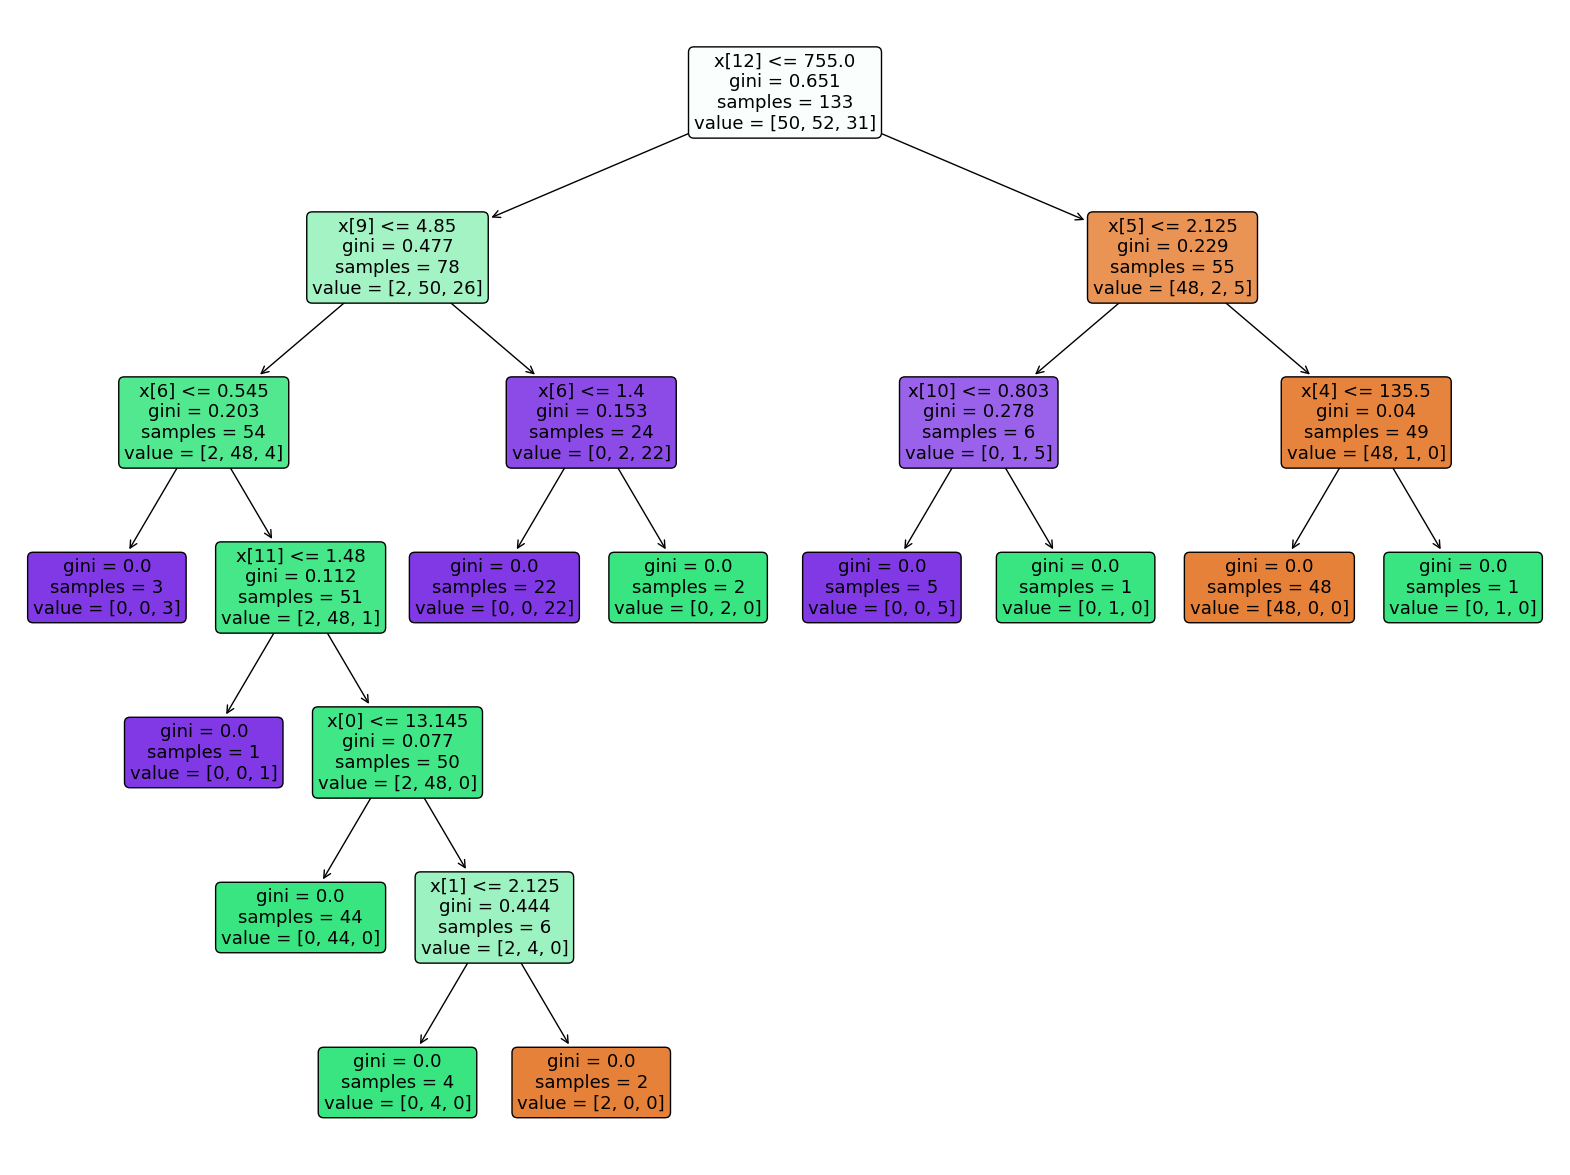

In [109]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clfs[0], filled=True, rounded=True)

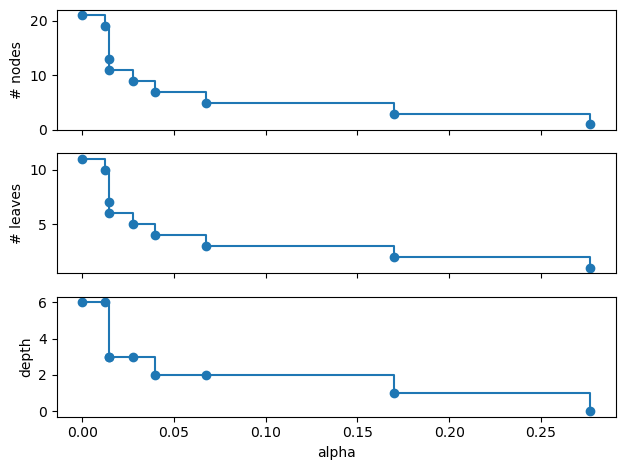

In [110]:
node_counts = [clf.tree_.node_count for clf in clfs]
leaf_counts = [leaves_count(clf) for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_ylabel("# nodes")
ax[1].plot(ccp_alphas, leaf_counts, marker="o", drawstyle="steps-post")
ax[1].set_ylabel("# leaves")
ax[2].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("depth")
fig.tight_layout()

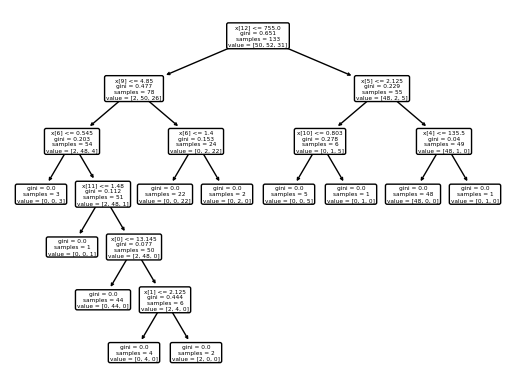

In [111]:
_ = tree.plot_tree(clfs[0], filled=False, rounded=True)

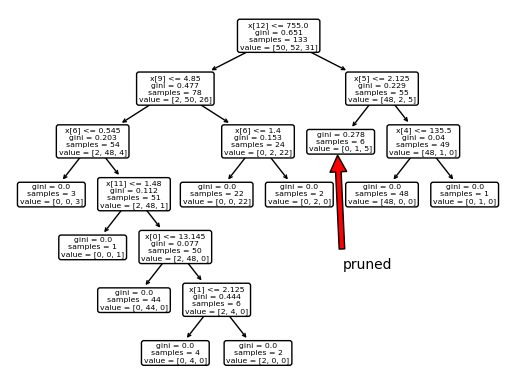

In [112]:
fig = plt.figure()
ax = fig.add_subplot()
_ = tree.plot_tree(clfs[1], filled=False, rounded=True)
_=ax.annotate('pruned', xy=(0.66, 0.62), xytext=(0.67, 0.3),
            arrowprops=dict(facecolor='red', shrink=0.05))

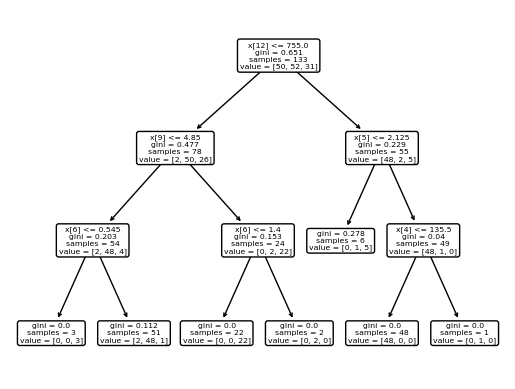

In [113]:
_ = tree.plot_tree(clfs[2], filled=False, rounded=True)

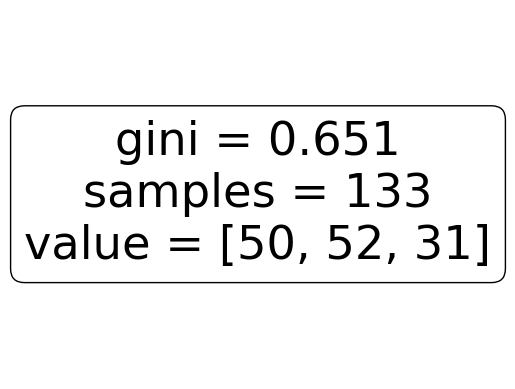

In [114]:
_ = tree.plot_tree(clfs[-1], filled=False, rounded=True)